# Problema de prever preço de casas usando o algoritmo de Regressão Linear

O problema que vamos tratar é tentar definir o preço de um casa a partir do seu tamanho, usando o método de resolução Regressão Linear.

Regressão Linear é usada para prever uma resposta quantitativa Y da variável preditora X supondo que essas duas variáveis tenham uma relação linear, ou seja, o algoritmo vai montar as relações de tamanho da casa com o preço, gerar uma reta passando por essas relações e partir dessa reta ele vai prever sobre uma casa nova não conhecida o preço dela.

In [1]:
from sklearn import linear_model as skln
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

### DataFrame contendo os dados de tamanho de casa e seus preços.

In [33]:
casas = pd.DataFrame([[426.72, 245000],
                     [487.68,  312000],
                     [518.16,  279000], 
                     [571.5,   308000], 
                     [335.28,  199000], 
                     [472.44,  219000],
                     [716.28,  405000],
                     [746.76,  324000],
                     [434.34,  319000],
                     [518.16,  255000]], columns=['Tamanho da casa em metros', 'Preço em dolar'])
print (casas)

   Tamanho da casa em metros  Preço em dolar
0                     426.72          245000
1                     487.68          312000
2                     518.16          279000
3                     571.50          308000
4                     335.28          199000
5                     472.44          219000
6                     716.28          405000
7                     746.76          324000
8                     434.34          319000
9                     518.16          255000


### Gráfico mostando a disperção dos dados

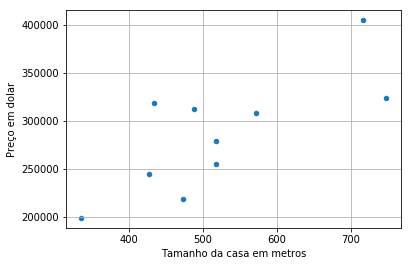

In [3]:
casas.plot.scatter(x = 'Tamanho da casa em metros', y = 'Preço em dolar', grid=1)

#### Vamos dividir o tamanho das casas e o preço em vetores diferentes para separar as features dos resultados

In [4]:
X = casas['Tamanho da casa em metros']
y = casas['Preço em dolar']

Para poder verificar se seu algoritmo esta prevendo os valores corretos temos que testar-lo de alguma forma. Uma forma que é bastante usada é dividir o seus dados, uma parte vai treinar o algoritmo e a outra você vai testa e comparar o resultados. 

Nesse exemplo vamos dividir 60% vai para teste e 40% vai para treino.


#### Seprando as features em X_train para treinar o algortimo e X_test para testes.

A função para treinar o algoritmo que será explicada mais a frente, recebe uma matriz como parametro das features. Como o X é um vetor, precisamos fazer o reshape que mantem as informações e apenas muda vetor para matriz.

In [34]:
X_train = X[:6]
X_train = X_train.values.reshape([X_train.shape[0], 1])

X_test = X[6:]
X_test = X_test.values.reshape([X_test.shape[0], 1])

#### Seprando os resultados em y_train e y_test

A função para treinar o algoritmo recebe apenas um vetor como resultado, então não precisamos fazer alterações aqui

In [36]:
y_train = y[:6]

y_test = y[6:]

#### Criamos um modelo de regressão linear

usando a função sklearn.linear_model.LinearRegression()

In [37]:
regressao = skln.LinearRegression()

#### Treinamos o modelo

usando modelo_que_criamos.fit(X,y) , sendo X uma matriz de feautres e y um vetor de respostas

In [39]:
regressao.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Testando o modelo

usando modelo_que_criamos.prefict(X), sendo X as features

In [40]:
y_pred = regressao.predict(X_test)

### Comparando os resultados

##### Com gráfico

Sendo os pontinhos vermelhos o X_test e y_test e a reta azul representa o X_tes e y_pred

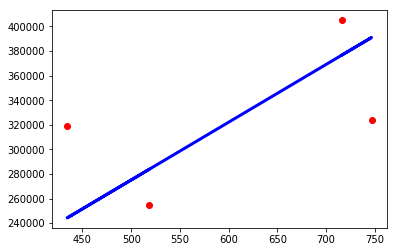

In [44]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

##### Com tabela

Sendo a linha 0 o y_test e a linha 1 o y_pred

In [45]:
pd.DataFrame([y_test.values, y_pred])

,0,1,2,3
0,405000.000000,324000.000000,319000.000000,255000.000000
1,376646.108664,390961.527166,244228.487518,283595.888399
